In [52]:
import sys
import numpy as np
from siman import header
from siman.header      import db # database dictionary
from siman.calc_manage import smart_structure_read, add, res
from siman.geo         import supercell
from siman.database    import read_database, write_database
from siman.SSHTools    import SSHTools
from siman.set_functions import read_vasp_sets
from siman.bands import plot_bands
from siman.neb import add_neb

read_database() # read saved results

({},
 {'static': <siman.set_functions.InputSet at 0x7f35d9446f28>,
  'opt': <siman.set_functions.InputSet at 0x7f35d83eb898>,
  None: <siman.set_functions.InputSet at 0x7f35d83ebef0>,
  '1': <siman.set_functions.InputSet at 0x7f35d337d9e8>,
  '1nb2': <siman.set_functions.InputSet at 0x7f35d337d978>},
 56)

In [53]:
header.PATH2NEBMAKE = '/home/ivarlamova/vtstscripts-937/nebmake.pl'
header.PATH2PROJECT    = 'neb' # path to project relative to your home folder on cluster
header.PATH2POTENTIALS = 'vasp/' # path to POTCAR files
header.ssh_object = SSHTools()
header.ssh_object.setup(user="ivarlamova",host="10.30.16.62",pkey="/home/ivarlamova/.ssh/id_rsa")

In [55]:
st = smart_structure_read(input_geo_file = 'LiFePO4/POSCAR_LPF') # read poscar
sc = supercell(st, [10.45, 12.18, 9.5]) # create 1x2x2 supercell, sizes 10.45 12.18 9.5 A 
sc.write_poscar()

-- Calculating mul_matrix for ortho: [10.45, 12.18, 9.5] 

mul_matrix_float:
 [[1.01122512 0.         0.        ]
 [0.         2.02645372 0.        ]
 [0.         0.         2.00760783]] 
mul_matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 2]] 
Old vectors (rprimd):
 [[10.3  0.   0. ]
 [ 0.   6.   0. ]
 [ 0.   0.   4.7]] 
New vectors (rprimd) of supercell:
 [[10.3  0.   0. ]
 [ 0.  12.   0. ]
 [ 0.   0.   9.5]] 
The supercell should contain 112.0 atoms ... 
  -- OK 

-- POSCAR was written to /home/ivarlamova/Rec10_DS/xyz/POSCAR__LPF_supercell 



'/home/ivarlamova/Rec10_DS/xyz/POSCAR__LPF_supercell'

In [7]:
sc_tet = sc.add_atom([0.89 / 1, 0.25 / 2, 0.855 / 2], 'H')  # create interstitial defect in octahedral position
sc_tet_oct = sc_tet.add_atom([1.00 / 1, 0.00 / 2, 0.50 / 2], 'H')  # create interstitial defect in tetrahedral position

sc_tet_oct.write_poscar('LFP_tet_oct/POSCAR')  

-- Directory LFP_tet_oct  was created 

-- POSCAR was written to /home/ivarlamova/Rec10_DS/LFP_tet_oct/POSCAR 



'/home/ivarlamova/Rec10_DS/LFP_tet_oct/POSCAR'

In [56]:
read_vasp_sets([('ion_relax', 'static', {'ISIF':2, 'IBRION':1, 'NSW':20, 'EDIFFG':-0.025}, 'override')]) #new set 'ion_relax' from 'static' with 'NSW' = 20
header.varset['ion_relax'].printme()


Attention! You have chosen to override set ion_relax
 

Warning! You did not change  ISIF  in ion_relax set
 

Warning! You did not change  IBRION  in ion_relax set
 

-- s.vasp_params['NELM']          = 100  
-- s.vasp_params['IBRION']        = 1  
-- s.vasp_params['KGAMMA']        = .TRUE.  
-- s.vasp_params['ENCUT']         = 441.0  
-- s.vasp_params['EDIFFG']        = -0.025  
-- s.vasp_params['SIGMA']         = 0.2  
-- s.vasp_params['NELMIN']        = 4  
-- s.vasp_params['ISTART']        = 0  
-- s.vasp_params['LSCALU']        = .FALSE.  
-- s.vasp_params['MAXMIX']        = 40  
-- s.vasp_params['NSIM']          = 4  
-- s.vasp_params['ISIF']          = 2  
-- s.vasp_params['EDIFF']         = 6e-06  
-- s.vasp_params['ENAUG']         = 776.16  
-- s.vasp_params['NSW']           = 20  
-- s.vasp_params['LPLANE']        = .TRUE.  
-- s.vasp_params['LREAL']         = Auto  
-- s.vasp_params['ISMEAR']        = 2  
-- s.vasp_params['NPAR']          = 1  
-- s.vasp_params['ALGO']    

In [57]:
# header.warnings = 'enyY'
add_neb(st = sc_tet_oct, it_new = 'LiFePO4', ise_new = 'ion_relax', it_new_folder = 'LiFePO4/neb',
        images = 3, corenum = 15, upload_vts = 0, atom_to_move = 'H', i_void_start = 1, i_void_final = 2, run = 0)

-- add_neb(): determine_symmetry_positions ... 

-- I have found  2 non-equivalent positions for H : dict_keys([112, 113]) 
-- Atom numbers:  {112: [113], 113: [114]} 

-- Please choose position using *i_void_start* : [1, 2] 

-- Position 1 chosen, atom: 113 H 

-- You have chosen vacancy_creation mode of add_neb tool 

-- Type of atom to move =  H 

I can suggest you 12 end positions. The distances to them are :  [ 2.52  8.01  9.46  9.46  9.47 10.33 10.33 10.71 11.3  11.69 12.02 12.02]  A
  They are  ['H'] atoms, use *i_void_final* to choose required: 1, 2, 3 .. 

-- Choosing position  2 with distance 8.01 A 

-- number of atom to delete =  113 

-- Making vacancy at end position for starting configuration 

-- Creating geo files for starting and final configurations (versions 1 and 2)  

replace_atoms(): atom 112 H replaced with H
replace_atoms(): atom 112 H replaced with H
-- Warning! File ./LiFePO4/neb/LiFePO4.n3H113v2/LiFePO4.n3H113v2.auto_created_starting_position_for_neb_vacancy

'LiFePO4.n3H113v2'

In [59]:
header.check_job = 0
res('LiFePO4.n3H113v2', 'ion_relax', [1,2,3,4,5], show = 'fomepp', up = 'up1') # try show = 'en', 'conv', 'est'
#res('LiFePO4122tet1', '1', 1, up = 'up1', show = 'fo')
#res('LiFePO4122tet2', '1', 1, up = 'up1',show = 'fo')
#res('LiFePO4122oct', '1', 1, up = 'up1',show = 'fo')

-- Low + high =  [3.1e-05, 0.0004, 0.00023, 0.0004, 2.5e-05, 9.6e-05, 0.00046, 0.0011] 

-- [False, False, False, False, False, False, False, True] 

-- Attention!, SCF was not converged to desirable prec 0.039 > 0.006 meV 



Max. F. tot  (meV/A) = 
[4073 6657 2527 1238 2703 1285  578  664  626  512  409  330  374  310
  309  322  302  276  283  278]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['LiFePO4.n3H113v2.ion_relax.1']| -765.1807  |10.33;12.02;9.46|-11373,-10176,-7968 |  20,15,312    
-- Low + high =  [3.1e-05, 0.0004, 0.00023, 0.0004, 2.5e-05, 9.6e-05, 0.00046, 0.0011] 

-- [False, False, False, False, False, False, False, True] 



Max. F. tot  (meV/A) = 
[4263 6442 2252 1283 1731 1056  593  347  398  281  181  149  180  184
  161  119   97  102  132   89]; 

-- db['LiFePO4.n3H113v2.ion_relax.2']| -763.3672  |10.33;12.02;9.46|-12153,-11262,-8495 |  20,11,236    
-- Low + high =  [3.1e-05, 0.0004, 0.000

(["db['LiFePO4.n3H113v2.ion_relax.5']| -763.4886  |10.33;12.02;9.46|-11265,-10340,-8300 |  20, 9,193   "],
 [])

-- Low + high =  [3.1e-05, 0.0004, 0.00023, 0.0004, 2.5e-05, 9.6e-05, 0.00046, 0.0011] 

-- [False, False, False, False, False, False, False, True] 

-- Attention!, SCF was not converged to desirable prec 0.039 > 0.006 meV 



Max. F. tot  (meV/A) = 
[4073 6657 2527 1238 2703 1285  578  664  626  512  409  330  374  310
  309  322  302  276  283  278]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['LiFePO4.n3H113v2.ion_relax.1']| -765.1807  |10.33;12.02;9.46|-11373,-10176,-7968 |  20,15,312    
-- Low + high =  [3.1e-05, 0.0004, 0.00023, 0.0004, 2.5e-05, 9.6e-05, 0.00046, 0.0011] 

-- [False, False, False, False, False, False, False, True] 



Max. F. tot  (meV/A) = 
[4263 6442 2252 1283 1731 1056  593  347  398  281  181  149  180  184
  161  119   97  102  132   89]; 

-- db['LiFePO4.n3H113v2.ion_relax.2']| -763.3672  |10.33;12.02;9.46|-12153,-11262,-8495 |  20,11,236    
-- Low + high =  [3.1e-05, 0.0004, 0.000

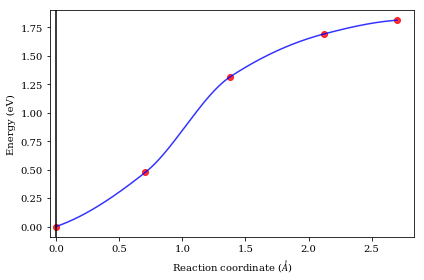

({'sts_loc': [<siman.classes.Structure at 0x7f35d83e43c8>,
  'sts': [<siman.classes.Structure at 0x7f35d83e4630>,
  'barrier': 1.8134638800000857,
  'dEm1': 1.3173739300000307,
  'atom_pos': [array([9.02626106, 1.502625  , 4.03483021]),
   array([9.44039424, 1.18435908, 3.42053566]),
   array([9.38024293, 0.75205141, 2.79061717]),
   array([10.18332238,  0.49994661,  2.77121278]),
   array([10.334,  0.   ,  2.366])],
  'mep_energies': [-765.18070263,
   -764.70372468,
   -763.8633287,
   -763.48856025,
   -763.36723875]},
 [])

In [58]:
header.warnings = 'yY' #control warning levels: n, e, y, Y
#header.check_job = 0
res('LiFePO4.n3H113v2', 'ion_relax', [1,2,3,4,5], show = 'fomepp', analys_type = 'neb'  )